In [36]:
#imports
#numpy,pandas,scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
#data
rawData = pd.read_csv('output.csv')
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,ACCT_BAL,RESULT,PAY_FREQ,AGE_GROUP
0,1,20000,FEMALE,UNIVERSITY,1,24,0,DEFAULT,1,GEN Z
1,2,120000,FEMALE,UNIVERSITY,2,26,3261,DEFAULT,4,GEN Z
2,3,90000,FEMALE,UNIVERSITY,2,34,15549,ACTIVE,6,MILLENNIAL
3,4,50000,FEMALE,UNIVERSITY,1,37,29547,ACTIVE,6,MILLENNIAL
4,5,50000,MALE,UNIVERSITY,1,57,19131,ACTIVE,6,GEN X


In [4]:
#Convert Result to Numeric
rawData['NRESULT'] = np.where(rawData['RESULT'] == 'DEFAULT', 0, 1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,ACCT_BAL,RESULT,PAY_FREQ,AGE_GROUP,NRESULT
0,1,20000,FEMALE,UNIVERSITY,1,24,0,DEFAULT,1,GEN Z,0
1,2,120000,FEMALE,UNIVERSITY,2,26,3261,DEFAULT,4,GEN Z,0
2,3,90000,FEMALE,UNIVERSITY,2,34,15549,ACTIVE,6,MILLENNIAL,1
3,4,50000,FEMALE,UNIVERSITY,1,37,29547,ACTIVE,6,MILLENNIAL,1
4,5,50000,MALE,UNIVERSITY,1,57,19131,ACTIVE,6,GEN X,1


In [5]:
rawData.drop(columns=['RESULT','AGE'], inplace=True)

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2296 non-null   int64 
 1   LIMIT_BAL  2296 non-null   int64 
 2   SEX        2296 non-null   object
 3   EDUCATION  2296 non-null   object
 4   MARRIAGE   2296 non-null   int64 
 5   ACCT_BAL   2296 non-null   int64 
 6   PAY_FREQ   2296 non-null   int64 
 7   AGE_GROUP  2296 non-null   object
 8   NRESULT    2296 non-null   int32 
dtypes: int32(1), int64(5), object(3)
memory usage: 152.6+ KB


In [7]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,ACCT_BAL,PAY_FREQ,AGE_GROUP,NRESULT
0,1,20000,FEMALE,UNIVERSITY,1,0,1,GEN Z,0
1,2,120000,FEMALE,UNIVERSITY,2,3261,4,GEN Z,0
2,3,90000,FEMALE,UNIVERSITY,2,15549,6,MILLENNIAL,1
3,4,50000,FEMALE,UNIVERSITY,1,29547,6,MILLENNIAL,1
4,5,50000,MALE,UNIVERSITY,1,19131,6,GEN X,1


In [8]:
credit = pd.get_dummies(rawData)
credit.head()

,ID,LIMIT_BAL,MARRIAGE,ACCT_BAL,PAY_FREQ,NRESULT,SEX_FEMALE,SEX_MALE,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,AGE_GROUP_GEN X,AGE_GROUP_GEN Z,AGE_GROUP_MILLENNIAL
0,1,20000,1,0,1,0,1,0,0,0,1,0,1,0
1,2,120000,2,3261,4,0,1,0,0,0,1,0,1,0
2,3,90000,2,15549,6,1,1,0,0,0,1,0,0,1
3,4,50000,1,29547,6,1,1,0,0,0,1,0,0,1
4,5,50000,1,19131,6,1,0,1,0,0,1,1,0,0


In [9]:
#X = rawData.loc[:,['LIMIT_BAL', 'MARRIAGE', 'ACCT_BAL', 'PAY_FREQ']]
#X = credit.drop(columns='NRESULT')
X = credit[['AGE_GROUP_GEN X', 'AGE_GROUP_GEN Z', 'AGE_GROUP_MILLENNIAL', 'EDUCATION_GRADUATE SCHOOL', 'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH SCHOOL', 'ACCT_BAL', 'PAY_FREQ', 'SEX_FEMALE', 'SEX_MALE']] 
#'EDUCATION_GRADUATE SCHOOL', 'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH SCHOOL', 'ACCT_BAL', 'PAY_FREQ', 'SEX_FEMALE', 'SEX_MALE'
X.head()

,AGE_GROUP_GEN X,AGE_GROUP_GEN Z,AGE_GROUP_MILLENNIAL,EDUCATION_GRADUATE SCHOOL,EDUCATION_UNIVERSITY,EDUCATION_HIGH SCHOOL,ACCT_BAL,PAY_FREQ,SEX_FEMALE,SEX_MALE
0,0,1,0,0,1,0,0,1,1,0
1,0,1,0,0,1,0,3261,4,1,0
2,0,0,1,0,1,0,15549,6,1,0
3,0,0,1,0,1,0,29547,6,1,0
4,1,0,0,0,1,0,19131,6,0,1


In [10]:
y = credit['LIMIT_BAL']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [11]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [12]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [13]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.16749301178384834
Linear Regression 0.2482474189906636
Support Vector Regression -0.04209783957560501


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = LinearRegression()
model = algo.fit(X_train,y_train)

In [15]:
model.score(X_test, y_test)

0.22558202609050382

In [16]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.226
RMSE: 114228.707


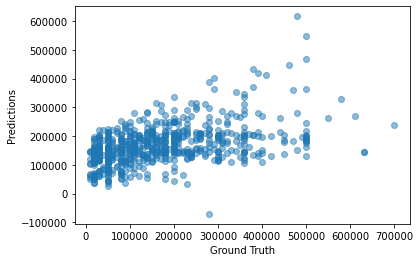

In [17]:
#fig, ax = plt.subplots(figsize=(20,5))
#ax.scatter(y_test,predictions, color='green',alpha=0.5)
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [38]:
algos_Class = []
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [39]:
X = credit[['AGE_GROUP_GEN X', 'AGE_GROUP_GEN Z', 'AGE_GROUP_MILLENNIAL', 'EDUCATION_GRADUATE SCHOOL', \
            'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH SCHOOL', 'PAY_FREQ', 'SEX_FEMALE', 'SEX_MALE', 'ACCT_BAL']] 
X.head()

,AGE_GROUP_GEN X,AGE_GROUP_GEN Z,AGE_GROUP_MILLENNIAL,EDUCATION_GRADUATE SCHOOL,EDUCATION_UNIVERSITY,EDUCATION_HIGH SCHOOL,PAY_FREQ,SEX_FEMALE,SEX_MALE,ACCT_BAL
0,0,1,0,0,1,0,1,1,0,0
1,0,1,0,0,1,0,4,1,0,3261
2,0,0,1,0,1,0,6,1,0,15549
3,0,0,1,0,1,0,6,1,0,29547
4,1,0,0,0,1,0,6,0,1,19131


In [40]:
y = credit['NRESULT']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: NRESULT, dtype: int32

In [41]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [42]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.681608901175788
Random Forest Classifier 0.7042634402179787
Gradient Boosting Classifier 0.7739546181106617


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
model.score(X_test, y_test)

0.7663280116110305

In [45]:
prediction = model.predict(X_test)
print(classification_report(y_test, prediction, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10       161
           1       0.77      0.98      0.87       528

    accuracy                           0.77       689
   macro avg       0.64      0.52      0.48       689
weighted avg       0.71      0.77      0.69       689



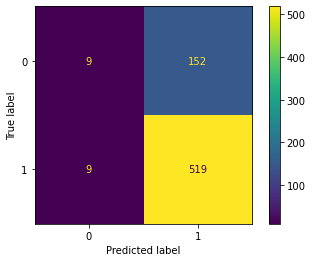

In [46]:
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()